# **Email Spam Classification**

## Data description

The data set we are using contains randomly picked email files, in addition, the respective labels for spam or
not-spam. The emails have been processed for us, leaving 3002 columns(words in the email) and 5172 rows.


## Method of analysis

The method of analysis applied to this data set will be classification. I will be using logistic
regression as our base model and Naive Bayes as our secondary model. I have chosen a
logistic model because we are focusing on binary classification (spam/ not spam). Secondly,
Naive Bayes is the classification technique we will be using on this data set. By correlating the
use of tokens such as words and phrases in emails, it will allow us to calculate the likelihood of
an email as spam. The independent variables (numeric variables) are words/phrases that occur in
the emails. The dependent variable (“Prediction”), in this case, is the predictor of whether or not
the email is spam.
At the end, I will be comparing these two models using performance metrics to determine the
best performing model.


## Loading data

In [ ]:
import pandas as pd

In [ ]:
#Read csv file
df = pd.read_csv('emails.csv')

In [ ]:
#Read csv file
wdf = pd.read_csv('word_count.csv')

In [ ]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


## Descriptive statistics

In [ ]:
# The following descriptive statistics outputs below will help guide our analysis

In [ ]:
# Displays the number of rows and columns. There are 5172 rows and 3002 columns. 
df.shape

(5172, 3002)

In [ ]:
# Top five rows are displayed
df.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Displays the summary of statistics per column in the emails dataset
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [ ]:
df.mean().sum()

1165.5794663573085

In [ ]:
# Shows the datatypes for the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


## Missing values and outliers

In [ ]:
# drop email ID as this isn't necessary for our analysis
df= df.drop(columns='Email No.')

In [ ]:
# Checks for missing values in dataset
# There are none so we do not need to handle missing values
df.isnull().any().sum()

0

In [ ]:
# Checks for outliers
z_scores= df.apply(lambda x: np.abs((x-x.mean())/x.std()))
outliers= df[z_scores >3]

In [ ]:
outliers.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# according to this output, we have z_scores greater than 3 in all of our records . 
# We have decided to keep the outliers into our dataset because in our dataset will naturally have high z_score because the count of words in an email will be inconsistent
# and will vary depending on the email itself

outlier_count= outliers.count()
outlier_count

the           109
to            113
ect            67
and           120
for           113
             ... 
military       17
allowing       19
ff             45
dry            32
Prediction      0
Length: 3001, dtype: int64

In [ ]:
df.mean().head(20)

the       6.640565
to        6.188128
ect       5.143852
and       3.075599
for       3.124710
of        2.627030
a        55.517401
you       2.466551
hou       2.024362
in       10.600155
on       10.935808
is        5.386118
this      1.388631
enron     1.335267
i        45.857889
be        3.229312
that      0.924401
will      0.850928
have      0.804718
with      0.939675
dtype: float64

In [ ]:
outlier_count.head(20)

the      109
to       113
ect       67
and      120
for      113
of       112
a        110
you      124
hou       69
in       114
on       109
is       110
this     117
enron     55
i        119
be       117
that     109
will      81
have      92
with      84
dtype: int64

In [ ]:
#IF we decided to drop all outliers, we will be left with only 5 records to work with. This is not ideal.
outliers_indices=  np.where(np.abs(z_scores)>3)[0]
df_drop_outliers= df.drop(outliers_indices)
df_drop_outliers.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
66,0,0,1,0,1,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
87,0,1,1,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
88,0,0,1,0,1,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
260,3,0,1,1,0,0,8,0,1,3,...,0,0,0,0,0,0,0,0,0,0
302,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Data visualization

In [ ]:
# Altered dataset contains words that contain 3 characters or more
wdf1 = wdf[wdf['word'].str.len()>=3]
wdf2 = wdf1.head(20)

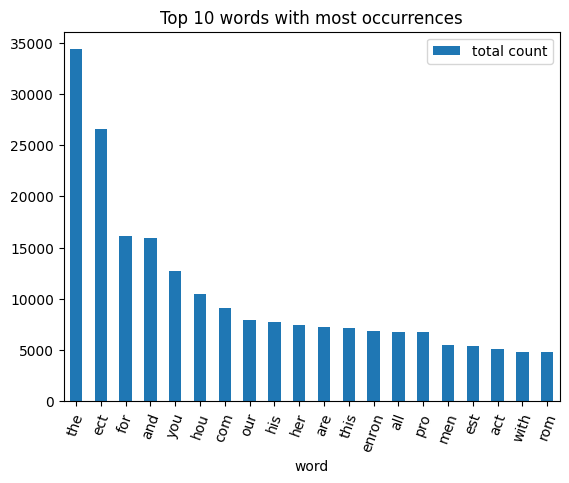

In [ ]:
# Plotting top ten words with the most occurrences count
%matplotlib inline
import matplotlib.pyplot as plot
wdf2.plot.bar(x="word",y="total count", rot=70, title="Top 10 words with most occurrences");
plot.show(block=True);

<ipython-input-51-4761d528363d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Prediction)


<Axes: xlabel='Prediction', ylabel='Density'>

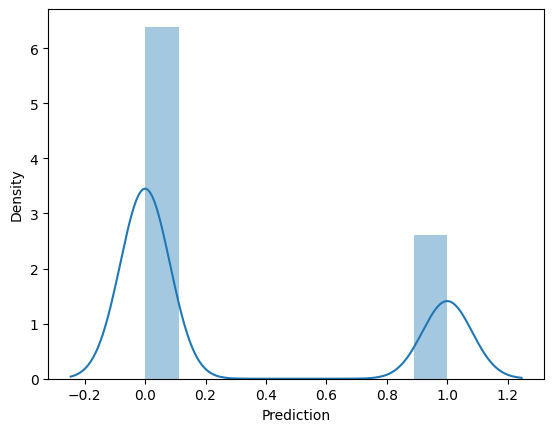

In [ ]:
# Shows distribution of the 'Prediction' and density
sns.distplot(df.Prediction)

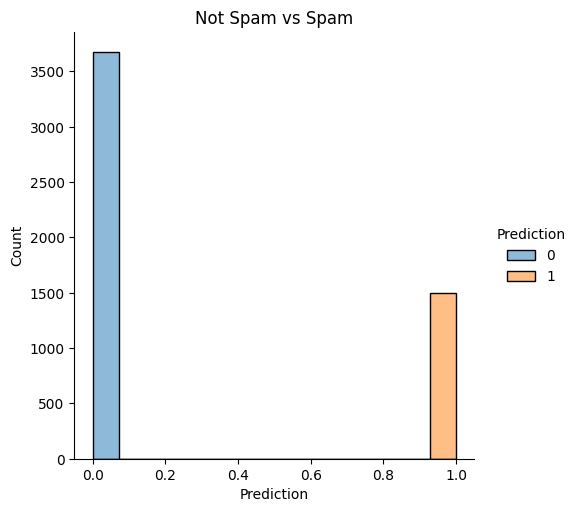

In [ ]:
# Shows frequency of 'Prediction' column, Spam = 1, Not-Spam = 0
sns.displot(data=df, x='Prediction', hue='Prediction')
plt.title('Not Spam vs Spam')
plt.show()

Visualizing ratio Spam or Not Spam


<function matplotlib.pyplot.show(close=None, block=None)>

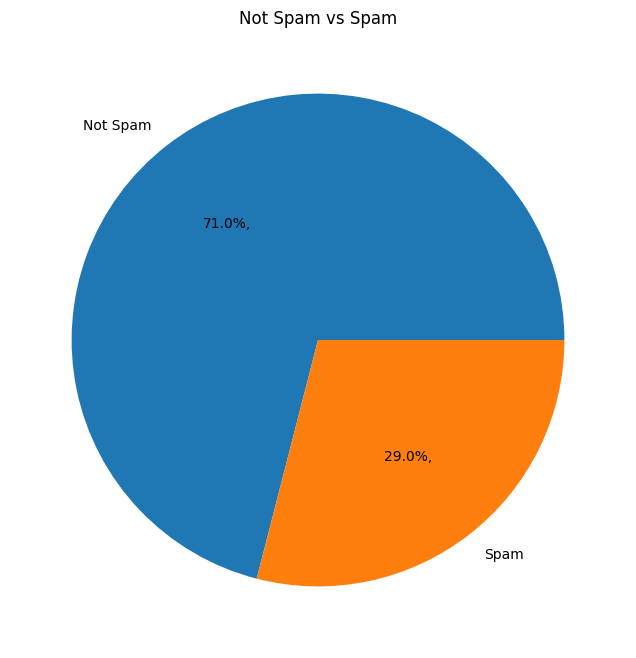

In [ ]:
# Shows the proportion of Spam and Not-Spam in pie chart
print("Visualizing ratio Spam or Not Spam")
sp_proportions = pd.value_counts(df['Prediction'], sort=True)
sp_proportions.plot(kind = 'pie',labels=['Not Spam','Spam'], autopct='%1.1f%%,')
plt.title('Not Spam vs Spam')
plt.ylabel('')
plt.show

## Correlation analysis

In [ ]:
# Displays correalation matrix
matrix = df.corr()

In [ ]:
matrix

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,1.000000,0.852715,0.337249,0.841200,0.784112,0.796397,0.784451,0.471392,0.303621,0.845670,...,0.008926,0.075479,0.225586,0.223426,0.101768,0.129466,0.127019,0.341878,0.051021,-0.004421
to,0.852715,1.000000,0.375480,0.825474,0.781971,0.752722,0.896466,0.508513,0.347993,0.881759,...,0.013250,0.101247,0.232847,0.255793,0.093322,0.091639,0.120059,0.406666,0.071388,0.055277
ect,0.337249,0.375480,1.000000,0.272863,0.369777,0.178028,0.400009,0.155783,0.974152,0.298387,...,0.134339,0.031431,0.046080,0.061550,0.004393,-0.007690,0.004368,0.141460,0.002492,-0.120782
and,0.841200,0.825474,0.272863,1.000000,0.751287,0.809665,0.815196,0.476764,0.235953,0.874276,...,0.005151,0.104454,0.272963,0.253440,0.151980,0.084147,0.124766,0.400225,0.042484,0.114364
for,0.784112,0.781971,0.369777,0.751287,1.000000,0.681457,0.744098,0.495852,0.329051,0.762659,...,0.022168,0.041775,0.236213,0.213631,0.134469,0.067151,0.121057,0.301074,0.038126,-0.003101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.129466,0.091639,-0.007690,0.084147,0.067151,0.073004,0.111685,0.006498,0.005429,0.120620,...,-0.002249,-0.002979,0.043408,0.104297,0.041300,1.000000,0.055227,0.049524,0.010835,0.064850
allowing,0.127019,0.120059,0.004368,0.124766,0.121057,0.108786,0.105358,0.082757,-0.000966,0.138099,...,-0.002675,-0.003543,-0.005130,0.018550,0.276001,0.055227,1.000000,0.096212,-0.003995,0.011279
ff,0.341878,0.406666,0.141460,0.400225,0.301074,0.444252,0.464473,0.195058,0.114210,0.448303,...,0.005403,0.073690,0.130356,0.164296,0.114092,0.049524,0.096212,1.000000,0.049690,0.135479
dry,0.051021,0.071388,0.002492,0.042484,0.038126,0.026403,0.093822,0.028883,0.000601,0.077751,...,-0.003373,0.035028,-0.006468,0.018939,-0.003137,0.010835,-0.003995,0.049690,1.000000,-0.006260


In [ ]:
matrix.to_csv('/content/spam_correlation.csv') # this used to analyze the correlation using Excel

In [ ]:
spam_corr= pd.DataFrame(matrix[3000:3001])

In [ ]:
spam_corr=spam_corr.transpose()

In [ ]:
spam_corr= spam_corr.sort_values('Prediction',ascending=False)
spam_corr= spam_corr['Prediction'].rename('correlation_to_prediction')

In [ ]:
spam_corr.head(60) ## we do have multicollinearity

Prediction      1.000000
more            0.258152
our             0.228187
able            0.222219
best            0.221703
ur              0.220253
sex             0.220092
sec             0.217402
money           0.217215
soft            0.213382
dr              0.212413
mo              0.210056
via             0.204031
prescription    0.203896
remove          0.203384
cheap           0.200348
meds            0.198501
drug            0.197976
of              0.197234
ali             0.194936
ic              0.194706
cia             0.191742
offer           0.190368
off             0.189532
your            0.186149
prices          0.186026
x               0.185243
ii              0.183439
paliourg        0.183138
press           0.183071
z               0.182781
most            0.182742
doctor          0.181402
thousand        0.180324
ut              0.178362
ft              0.177806
invest          0.176762
pre             0.176626
v               0.176596
rx              0.175801


In [ ]:
# print correlation matrix
print("Correlation Matrix is : ")
print(matrix)

Correlation Matrix is : 
                 the        to       ect       and       for        of  \
the         1.000000  0.852715  0.337249  0.841200  0.784112  0.796397   
to          0.852715  1.000000  0.375480  0.825474  0.781971  0.752722   
ect         0.337249  0.375480  1.000000  0.272863  0.369777  0.178028   
and         0.841200  0.825474  0.272863  1.000000  0.751287  0.809665   
for         0.784112  0.781971  0.369777  0.751287  1.000000  0.681457   
...              ...       ...       ...       ...       ...       ...   
military    0.129466  0.091639 -0.007690  0.084147  0.067151  0.073004   
allowing    0.127019  0.120059  0.004368  0.124766  0.121057  0.108786   
ff          0.341878  0.406666  0.141460  0.400225  0.301074  0.444252   
dry         0.051021  0.071388  0.002492  0.042484  0.038126  0.026403   
Prediction -0.004421  0.055277 -0.120782  0.114364 -0.003101  0.197234   

                   a       you       hou        in  ...  connevey       jay  \
the    

## Data preprocessing

In [ ]:
x = df.iloc[: ,1:-1] # all features except 'Prediction' column
y = df.iloc[:,-1:] # 'Prediction' column

In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train , y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [ ]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
x=scaler.fit_transform(x)

## Modeling

In [ ]:
# Naive rule is to classify everything into the majority class. In this case, the majority of emails would be in class 0, Not Spam.
# Checking the proportions of the two classes in the Prediction column, the percentage of the Not Spam (class 0) is 71% whereas the percentage of Spam (class 1) is 29%. 
df['Prediction'].value_counts(normalize = True).round(2)

0    0.71
1    0.29
Name: Prediction, dtype: float64

# Gaussian Naive Bayes

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

    Not-Spam       0.96      0.98      0.97       703
        Spam       0.96      0.91      0.93       332

    accuracy                           0.96      1035
   macro avg       0.96      0.94      0.95      1035
weighted avg       0.96      0.96      0.96      1035


Accuracy GNB:  0.9575
Precision: 0.9096
Sensitivity: 0.9557
Specificity: 0.9583
F1-Score: 0.9321


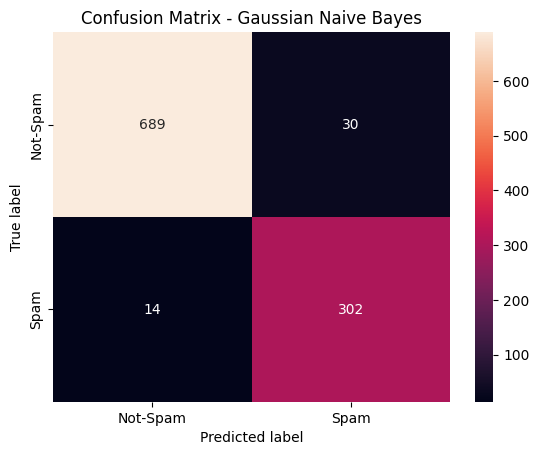

In [ ]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred_gnb = gnb.predict(x_test)

#performance metrics
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)

target_labels = ['Not-Spam','Spam']
print(classification_report(y_pred_gnb, y_test, target_names=target_labels))
#Specificity: TN / (TN+FP)
print()

cm1 = confusion_matrix(y_test, y_pred_gnb)

tn, fp, fn, tp = cm1.ravel()

sensitivity_gnb = tp / (tp + fn)
specificity_gnb = tn / (tn + fp)

#print performance metrics
print("Accuracy GNB: ", accuracy_gnb.round(4))
print("Precision:", precision_gnb.round(4))
print("Sensitivity:", sensitivity_gnb.round(4))
print("Specificity:", specificity_gnb.round(4))
print("F1-Score:", f1_gnb.round(4))

cm1 = confusion_matrix(y_test, y_pred_gnb)
spam_type = ['TN','FP','FN','TP']
spam_count = ["{0:0.0f}".format(value) for value in cm1.flatten()]

ax= plt.subplot()
sns.heatmap(cm1, annot=True, fmt='')
ax.set_xlabel('Predicted label');ax.set_ylabel('True label'); 
ax.set_title('Confusion Matrix - Gaussian Naive Bayes'); 
ax.xaxis.set_ticklabels(['Not-Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not-Spam', 'Spam']);

total1=sum(sum(cm1))

# Multinomial Naive Bayes

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

    Not-Spam       0.94      0.98      0.96       693
        Spam       0.95      0.88      0.91       342

    accuracy                           0.94      1035
   macro avg       0.95      0.93      0.94      1035
weighted avg       0.94      0.94      0.94      1035

Accuracy MNB:  0.944
Precision: 0.8772
Sensitivity: 0.9494
Specificity: 0.9416
F1-Score: 0.9119


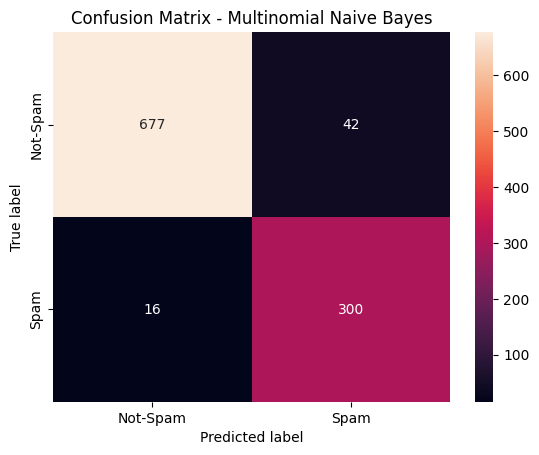

In [ ]:
# Multinomial Naive Bayes
mnb =  MultinomialNB ( alpha = 0.1 )
mnb.fit(x_train, y_train)

y_pred_mnb = mnb.predict(x_test)

#performance metrics
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
precision_mnb = precision_score(y_test, y_pred_mnb)
f1_mnb = f1_score(y_test, y_pred_mnb)

target_labels = ['Not-Spam','Spam']
print(classification_report(y_pred_mnb, y_test, target_names=target_labels))

# Create confusion matrix for MNB model
cm2 = confusion_matrix(y_test, y_pred_mnb)
spam_type2 = ['TN','FP','FN','TP']
spam_count2 = ["{0:0.0f}".format(value) for value in cm2.flatten()]

# Create heatmap for confusion matrix
ax= plt.subplot()
sns.heatmap(cm2, annot=True, fmt='')
ax.set_xlabel('Predicted label');ax.set_ylabel('True label'); 
ax.set_title('Confusion Matrix - Multinomial Naive Bayes'); 
ax.xaxis.set_ticklabels(['Not-Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not-Spam', 'Spam']);

total1=sum(sum(cm2))

cm2 = confusion_matrix(y_test, y_pred_mnb)

tn, fp, fn, tp = cm2.ravel()

sensitivity_mnb = tp / (tp + fn)
specificity_mnb = tn / (tn + fp)

#print performance metrics
print("Accuracy MNB: ", accuracy_mnb.round(4))
print("Precision:", precision_mnb.round(4))
print("Sensitivity:", sensitivity_mnb.round(4))
print("Specificity:", specificity_mnb.round(4))
print("F1-Score:", f1_mnb.round(4))

cm2 = confusion_matrix(y_test, y_pred_mnb)
spam_type = ['TN','FP','FN','TP']
spam_count = ["{0:0.0f}".format(value) for value in cm2.flatten()]

# Logistic Regression

In [ ]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from sklearn.metrics import confusion_matrix

In [ ]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(x_train, y_train)

predictions = logit_reg.predict(x_test)

#performance metrics
accuracy= accuracy_score(y_test, predictions)
precision= precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

#calculate confusion matrix
cm= confusion_matrix(y_test, predictions)

tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#print performance metrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-Score:", f1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.961352657004831
Precision: 0.9423076923076923
Sensitivity: 0.930379746835443
Specificity: 0.9749652294853964
F1-Score: 0.9363057324840764


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy MNB:  0.944
Precision: 0.8772
Sensitivity: 0.9494
Specificity: 0.9416
F1-Score: 0.9119


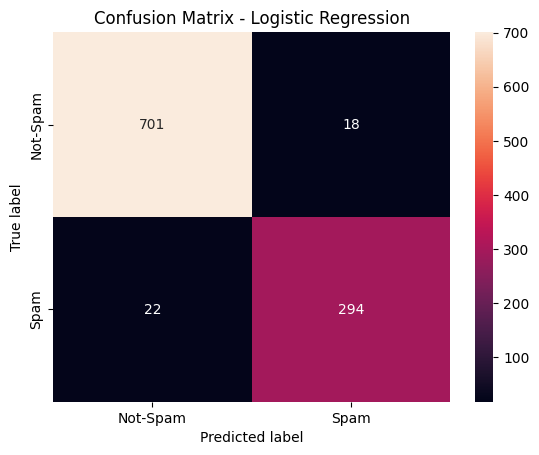

In [ ]:
# Create heatmap for confusion matrix
ax= plt.subplot()
sns.heatmap(cm3, annot=True, fmt='')
ax.set_xlabel('Predicted label');ax.set_ylabel('True label'); 
ax.set_title('Confusion Matrix - Logistic Regression'); 
ax.xaxis.set_ticklabels(['Not-Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not-Spam', 'Spam']);

total1=sum(sum(cm3))

cm3 = confusion_matrix(y_test, y_pred_mnb)

tn, fp, fn, tp = cm3.ravel()

sensitivity_mnb = tp / (tp + fn)
specificity_mnb = tn / (tn + fp)

#print performance metrics
print("Accuracy MNB: ", accuracy_mnb.round(4))
print("Precision:", precision_mnb.round(4))
print("Sensitivity:", sensitivity_mnb.round(4))
print("Specificity:", specificity_mnb.round(4))
print("F1-Score:", f1_mnb.round(4))

cm3 = confusion_matrix(y_test, predictions)
spam_type = ['TN','FP','FN','TP']
spam_count = ["{0:0.0f}".format(value) for value in cm2.flatten()]

## **ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

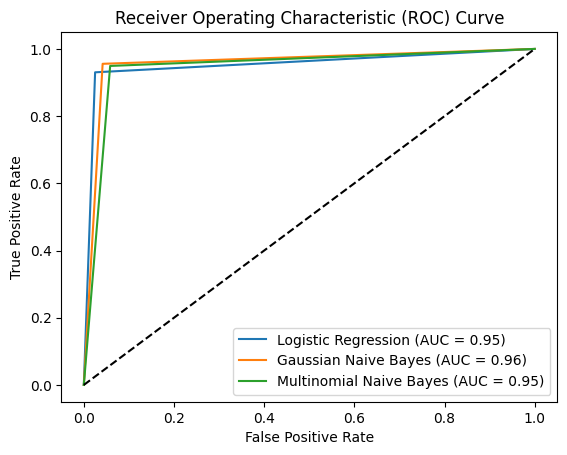

In [ ]:
#predictions variable for each model

# LR = predictions
# GNB= y_pred_gnb
# MNB =y_pred_mnb

#calculate the false positive rate and true positive rate
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, predictions)
gaussian_naive_bayes_fpr, gaussian_naive_bayes_tpr, _ = roc_curve(y_test, y_pred_gnb)
multi_naive_bayes_fpr, multi_naive_bayes_tpr, _= roc_curve(y_test, y_pred_mnb)

#calculate auc
logistic_auc = roc_auc_score(y_test, predictions)
gaussian_naive_bayes_auc = roc_auc_score(y_test, y_pred_gnb)
multi_naive_bayes_auc = roc_auc_score(y_test, y_pred_mnb)

#plot ROC 
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot(gaussian_naive_bayes_fpr, gaussian_naive_bayes_tpr, label=f'Gaussian Naive Bayes (AUC = {gaussian_naive_bayes_auc:.2f})')
plt.plot(multi_naive_bayes_fpr, multi_naive_bayes_tpr, label=f'Multinomial Naive Bayes (AUC = {multi_naive_bayes_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
